In [35]:
import ROOT
import math
import numpy as np
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

First prepare the root file with the data_file class

In [2]:
from data_file import data_file

s = 2.76E3 # total reaction energy
infilename  = '../data/D0D0Bar30TO50_New.dat'
outfilename = '../data/D0D0Bar30TO50_New.root'

# Create the data file and close it for now
file = data_file(s, infilename, outfilename)
file.close()

# Open again in read only mode
rfile = ROOT.TFile(outfilename, 'READ')

In [9]:
c1 = ROOT.TCanvas("c1","c1",800,600)
h1 = ROOT.TH2F('rel_mom_v_sep', 'Lab Frame', 20, 0, 50, 20, 0, 50)

for entry in rfile.lab:
    # calculate relative separation
    xD      = ROOT.TVector3(entry.D_x, entry.D_y, entry.D_z)
    xDstar  = ROOT.TVector3(entry.Dstar_x, entry.Dstar_y, entry.Dstar_z)
    xRel    = xD - xDstar
    relSep  = xRel.Mag() 

    # relative momenta
    pD      = ROOT.TVector3(entry.D_px, entry.D_py, entry.D_pz)
    pDstar  = ROOT.TVector3(entry.Dstar_px, entry.Dstar_py, entry.Dstar_pz)
    pRel    = pD - pDstar
    relMom  = pRel.Mag() 
    
    h1.Fill(relSep, relMom)

In [10]:
h1.GetXaxis().SetTitle("Relative Separation [fm]")
h1.GetYaxis().SetTitle("Relative Momentum [GeV]")
h1.SetOption("COLZ")     # colored bins
h1.SetStats(0)           # remove stats box
h1.Draw()

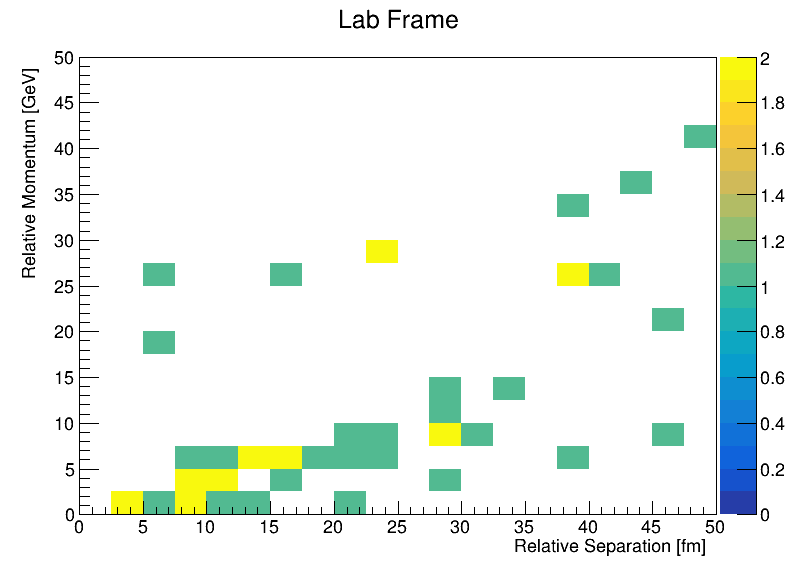

In [5]:
c1.Modified()
c1.Draw()

In [7]:
c2 = ROOT.TCanvas("c2","c2", 800, 600)
h2 = ROOT.TH2F('cm_sepvmom', 'CM Frame', 20, 0, 50, 20, 0, 50)

for entry in rfile.cm:
    # calculate relative separation
    rD_cm      = ROOT.TVector3(entry.D_x, entry.D_y, entry.D_z)
    rDstar_cm  = ROOT.TVector3(entry.Dstar_x, entry.Dstar_y, entry.Dstar_z)
    rRel_cm    = rD_cm - rDstar_cm
    relSep_cm  = rRel_cm.Mag() 

    # relative momenta
    pCM     = ROOT.TVector3(entry.CM_px, entry.CM_py, entry.CM_pz)
    relMom_cm  = 2 * pCM.Mag() 
    
    h2.Fill(relSep_cm, relMom)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TFile::Append>: Replacing existing TH1: cm_sepvmom (Potential memory leak).


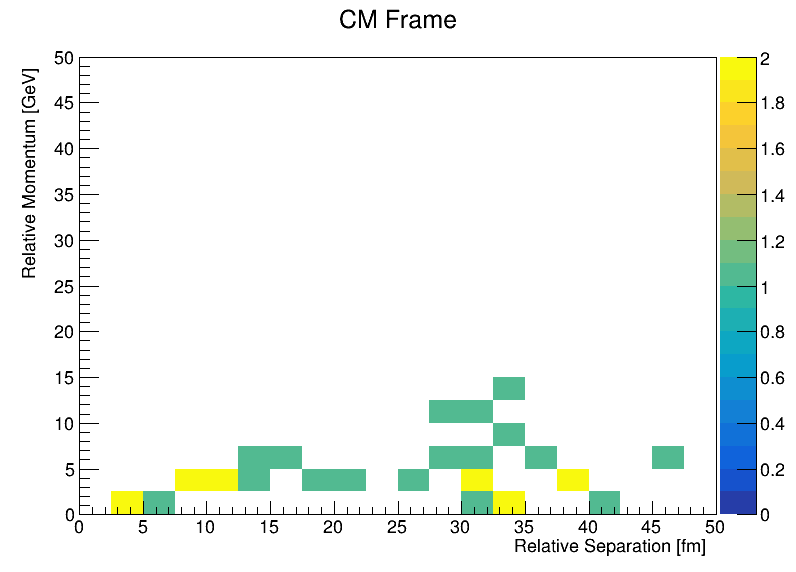

In [13]:
h2.GetXaxis().SetTitle("Relative Separation [fm]")
h2.GetYaxis().SetTitle("Relative Momentum [GeV]")
h2.SetOption("COLZ")     # colored bins
h2.SetStats(0)           # remove stats box
h2.Draw()
c2.Modified()
c2.Draw()

In [55]:
mD     = 1.86484
mDstar = 2.00685

def Kallen(x, y, z):
    return x*x + y*y + z*z - 2*(x*y + x*z + y*z)

def Momentum_CM(W, m1, m2):
    num = math.sqrt(Kallen(W*W, m1*m1, m2*m2))
    den = 2 * W
    return num / den 

N = rfile.cm.GetEntries()
pCM_exp      = np.zeros((N, 1))
W_DDstar_exp = np.zeros((N, 1))

i = 0 
for entry in rfile.cm:
    pCM                 = ROOT.TVector3(entry.CM_px, entry.CM_py, entry.CM_pz)
    W_DDstar_exp[i,0]   = entry.W_DDstar # invariant mass
    pCM_exp[i,0]        = pCM.Mag()
    i += 1

pCM_theo       = np.zeros((200, 1))
W_DDstar_theo  = np.zeros((200, 1))

j = 0
minW = mD + mDstar + 0.001
while j < 200:
    W = minW + j * (150 - minW) / 200
    W_DDstar_theo[j, 0] = W
    pCM_theo[j, 0] = Momentum_CM(W, mD, mDstar)
    j += 1

In [83]:
c3 = ROOT.TCanvas("c3","c3", 800, 600)

expected   = ROOT.TGraph(200, W_DDstar_theo, pCM_theo)
expected.SetTitle("CM Momentum")
expected.GetXaxis().SetTitle("W_{DD*}   [GeV]")
expected.GetYaxis().SetTitle("|#vec{p}_{cm}|   [GeV]")
expected.SetLineColor(ROOT.kRed)
expected.SetLineWidth(4)

calculated = ROOT.TGraph(N, W_DDstar_exp, pCM_exp)
calculated.SetMarkerSize(1)
calculated.SetMarkerStyle(4)

expected.Draw("AL")
calculated.Draw("P")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3


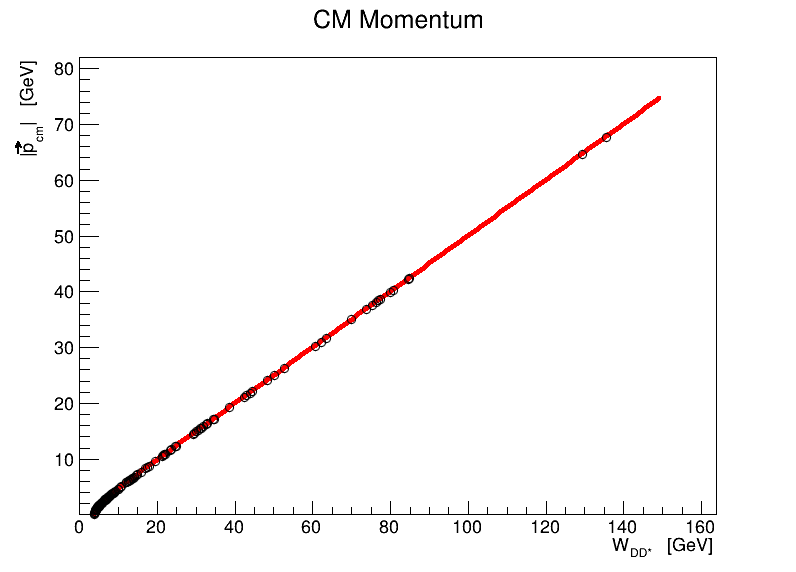

In [84]:
c3.Modified()
c3.Draw()